No more images found in 000000.
Finished processing folder: 000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
The predicted class for this image is: 100000
Processing image: /home/triet/AI/data2/010000/1.jpg
Expected:  010000  Actual:  100000
Total Pass:  0
Total Fail:  1
Total List:  ['/home/triet/AI/data2/010000/1.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The predicted class for this image is: 000000
Processing image: /home/triet/AI/data2/010000/2.jpg
Expected:  010000  Actual:  000000
Total Pass:  0
Total Fail:  2
Total List:  ['/home/triet/AI/data2/010000/1.jpg', '/home/triet/AI/data2/010000/2.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The predicted class for this image is: 000000
Processing image: /home/triet/AI/data2/010000/3.jpg
Expected:  010000  Actual:  000000
Total Pass:  0
Total Fail:  3
Total List:  ['/home/triet/AI/data2/010000/1.jpg', '/home/triet/AI/data2/010000/2.jpg', '/home/triet/AI/data2/010000/3.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The predicted class for thi

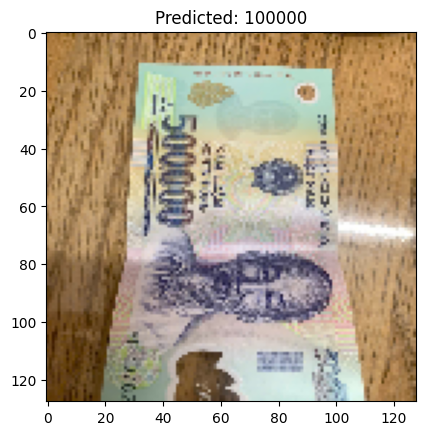

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model  # type: ignore
import os

# Thư mục chứa các hình ảnh
folder_path = '/home/triet/AI/data2/'

# Đường dẫn tới mô hình đã lưu
model_path = 'vggmodel.h5'

# Tải mô hình
loaded_model = load_model(model_path)

# Danh sách các lớp tương ứng với chỉ số
class_names = ['000000','010000', '020000', '050000', '100000', '200000', '500000']

failed_images_only = None

# Hàm để dự đoán và hiển thị hình ảnh
def predict_image(image_path):
    try:
        # Đọc ảnh và chuẩn bị ảnh cho mô hình
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        # img = img.astype('float32') / 255
        img = np.expand_dims(img, axis=0)

        # Sử dụng mô hình đã tải để dự đoán
        prediction = loaded_model.predict(img)
        predicted_class = np.argmax(prediction)
        predicted_label = class_names[predicted_class]

        # Hiển thị kết quả
        print(f"The predicted class for this image is: {predicted_label}")
        plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted: {predicted_label}")
        # plt.show()
        return predicted_label
    except Exception as e:
        print("Error reading image:", e)

# Kiểm tra liên tục các hình ảnh


total_pass = 0
total_fail = 0
total_list_case = []

if failed_images_only:
    for image_path in failed_images_only:
        predicted_label = predict_image(image_path)
        expected_label = os.path.basename(os.path.dirname(image_path))

        if expected_label == predicted_label:
            total_pass += 1
        else:
            total_fail += 1
            total_list_case.append(image_path)

        print("Processing image:", image_path)
        print("Expected:", expected_label, "Actual:", predicted_label)
        print("Total Pass:", total_pass)
        print("Total Fail:", total_fail)
        print("Total List:", total_list_case)
else:
    for path in class_names:
        image_number = 1  # Reset image number for each class
        while True:
            image_path = os.path.join(
                folder_path + path, f'{image_number}.jpg')
            if os.path.isfile(image_path):
                predicted_label = predict_image(image_path)
                if path == predicted_label:
                    total_pass += 1
                else:
                    total_fail += 1
                    total_list_case.append(image_path)
                image_number += 1

                print("Processing image:", image_path)
                print("Expected: ", path, " Actual: ", predicted_label)
                print("Total Pass: ", total_pass)
                print("Total Fail: ", total_fail)
                print("Total List: ", total_list_case)
            else:
                print(f"No more images found in {path}.")
                break  # Only breaks out of the inner while loop
        print(f"Finished processing folder: {path}")

#  vggmodel_6labels.keras
# Total Pass:  35
# Total Fail:  93

# vggmodel.keras
# Total Pass:  42
# Total Fail:  86